# Visión por Computadora
### Integrantes
* Sergio Orellana 221122
* Rodrigo Mansilla 22611
* Ricardo Chuy 221007

# NOTA: En este avance se usa una imagen distinta ya que al momento de hacer la entrega en canvas, la imagen indicada en la guía "fingerprint_noisy.png" aún no se encontraba en el portal

## Task 2
Está desarrollando un sistema biométrico de seguridad. El sensor de huellas dactilares está sucio y produce imágenes binarias con dos tipos de defectos:

1. Pequeños puntos blancos en los valles negros de la huella (Ruido Sal)

2. Las “crestas” de la huella tienen pequeñas roturas que impiden que el algoritmo de matching funcione (grietas).

Con esto en mente realice:

1. Cargue la imagen fingerprint_noisy.png. Asegúrese de que sea binaria.

2. Aplique una operación morfológica para eliminar el ruido blanco sin destruir las crestas de la huella. (Seleccione entre Erosión, Dilatación, Apertura o Cierre).

3. Aplique una segunda operación secuencial para conectar las grietas en las crestas de la huella.

4. Muestre la imagen original, la imagen tras el paso 2, y la imagen final.



In [90]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [91]:
def show_img(img, descripcion="normal", figsize=(4, 4)):
    plt.figure(figsize=figsize)
    plt.imshow(img, cmap='gray', vmin=0, vmax=255)
    plt.title(f'Imagen {descripcion}')
    plt.xticks([]), plt.yticks([]) 
    plt.axis('off')
    plt.show()

In [92]:
def aplicar_dilatacion(imagen, kernel):

    

    print("dilatar imagen")

In [93]:
def aplicar_erosion(imagen, kernel):
    print("erosionar imagen")

    kernel_size = int(kernel.shape[0])
    
    # estoes como lo hicimos el lab pasado para el padding
    # la suma entera nos dice que tanto debemos agregar a los bordes para que el kernel
    # no se salga

    alto, ancho = imagen.shape
    pad = kernel_size // 2

    # como es erosion es necesario que el padding sea blanco, para
    # evitar puntos falsos en la imagen
    img_padded = np.pad(imagen, pad, mode='constant', constant_values=255)

    imagen_erosionada = np.zeros_like(imagen)

    # la forma del algoritmo es casi que lo mismo que la convolucion
    # pero con la diferencia de la operacion que hacemos
    # en este caso se busca el minimo. para detectar si hay o
    for i in range(alto):
        for j in range(ancho):

            ventana = img_padded[i : i + kernel_size, j : j + kernel_size]

            # se usa el minimo porque logicamente, si el kernel no es completamente del color
            # se tomara el valor mas bajo que encuentre, en este caso 0 porque la imagen es binaria
            # tomar el minimo es lo mismo que decir, al menos 1 no es 255.
            val_minimo = np.min(ventana)

            imagen_erosionada[i, j] = val_minimo

    return imagen_erosionada

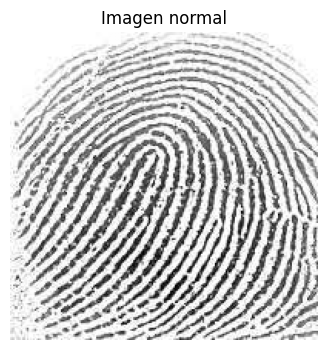

In [94]:
# parte 1
# primero la carga de la imagen normal
try:
    img = cv2.imread('./imgs/task2_img_example.jpg', cv2.IMREAD_GRAYSCALE)
    if img is None: raise FileNotFoundError
except:
    print("no se encontro la imagen")

show_img(img)

erosionar imagen


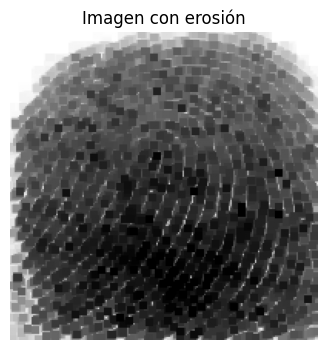

In [95]:
# ahora para poder quitar el ruido blanco, se hace
# la operacion de apertura. Pero como se solicita
# hacer esto en 2 pasos, entonces para demostar
# el funcionamiento es mejor hacer erosion y dilatacion
# lo cual es equivalente a la apertura

kernel = np.ones((5,5) , np.uint8)

img_erosion = aplicar_erosion(img, kernel)
show_img(img_erosion, "con erosión")


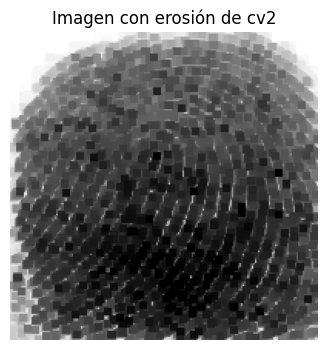

In [96]:
# version con cv2

img_erosion2 = cv2.erode(img, kernel, iterations=1)
show_img(img_erosion2, "con erosión de cv2")

Para esta parte se espera que su entregable muestre:

* Selección correcta de los Elementos Estructurantes (Forma y Tamaño) para cada paso.

* Calidad visual de la imagen final (sin ruido y continua)

* Responda: ¿El orden de los factores altera el producto? Explique qué hubiera pasado si hubiera aplicado las operaciones en orden inverso y demuéstrelo con un ejemplo visual en el notebook.

In [97]:
# parte 2, lo mismo pero inverso jej